# Redes Neuronales - TP2
## Ej 1

Implemente un perceptrón simple que aprenda la función lógica AND y la función lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

Las tablas de verdad de las funciones lógicas para 2 variables son:

AND
|A|B|Y|
|-|-|-|
|1|1|1|
|0|1|0|
|1|0|0|
|0|0|0|


OR
|A|B|Y|
|-|-|-|
|1|1|1|
|0|1|1|
|1|0|1|
|0|0|0|

Primero voy a hacerlo para los sets de 2 variables, y luego para 4 variables. Supongo que la clase 0 es -1 y la 1 es 1. 

Para encontrar la fórmula de la recta que hace de frontera de decisión se puede partir de la expresión de la sumatoria de los $X$ con sus respectivos pesos y el bias, y suponer que $Y=0$, lo que significa que estás parado sobre la frontera, tu muestra no es ni de una clase ni de la otra. 

$$
X1 \cdot w1 + X2 \cdot w2 + b = 0 
$$

Y si suponemos que $X1$ es nuestra abscisa que vamos a barrer y $X2$ es la ordenda la recta toma la forma de:

$$
X2 = \frac{w1 \cdot X1 + b}{-w2}
$$

Y entonces $m=-w1/w2 $ y b = $-b/w2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([-1,1,-1,1])
B = np.array([-1,-1,1,1])
Y1 = np.array([-1,-1,-1,1])
Y2 = np.array([-1,1,1,1])

# Convertir a matriz de columnas (A|B|Y)

datos_AND = np.column_stack((A, B, Y1))

datos_OR = np.column_stack((A, B, Y2))

print(datos_AND)

print(datos_OR)

[[-1 -1 -1]
 [ 1 -1 -1]
 [-1  1 -1]
 [ 1  1  1]]
[[-1 -1 -1]
 [ 1 -1  1]
 [-1  1  1]
 [ 1  1  1]]


In [3]:
class perceptron_simple:
    def __init__(self):
        self.pesos = None
        self.lr = None
        self.convergencia = False

    def predict(self, x):
        # x ya debe incluir el bias
        return 1 if np.dot(self.pesos, x) >= 0 else -1 # función signo para predecir

    def calcular_error(self, X, y):
        """calcula el error de clasificación en base a los pesos que tiene guardados, el X e Y. """
        error = 0
        for xi, target in zip(X, y):
            xi_con_bias = np.insert(xi, 0, 1) # agrega el 1 para la entrada de bias
            prediccion = self.predict(xi_con_bias) # hace la predicción con los pesos actuales
            if prediccion != target:
                error += 1
        return error

    def train(self, X, y, epochs=100, lr=0.01):
        """
        X: matriz de entradas (sin bias)
        y: vector de salidas esperadas
        epochs: cantidad de iteraciones sobre el dataset
        lr: learning rate
        """
        self.lr = lr
        self.pesos = np.zeros(X.shape[1] + 1)  # tantos pesos como columnas en X más el bias
        error_por_cambio = [] # vamos guardando el error por cada cambio de peso

        # inicializo los pesos en valores aleatorios entre -1 y 1.
        self.pesos = np.random.rand(X.shape[1] + 1)*2 -1 # tenemos valores de 0 a 2 y le resto 1 para tener negativos y positivos
        
        for _ in range(epochs):
            for xi, target in zip(X, y):
                xi_con_bias = np.insert(xi, 0, 1) # agrega el 1 para la entrada de bias
                prediccion = self.predict(xi_con_bias) # hace la predicción con los pesos actuales
                error = target - prediccion # calcula el error como la diferencia entre el valor esperado y el predicho
                self.pesos += self.lr * error * xi_con_bias
                error_luego_de_cambio = self.calcular_error(X,y)
                error_por_cambio.append(error_luego_de_cambio) # guardo el error cada vez que cambia un peso
                if error_luego_de_cambio < 0.01: # condición de corte: si no hay error, convergió
                    break
            if error_luego_de_cambio < 0.01: # condición de corte: si no hay error, convergió
                self.convergencia = True
                break
        if self.convergencia == True:
            return error_por_cambio
        else:
            return 0


abajo pongo una función que calcula los parámetros de la recta como se describió antes. 

In [4]:
def calcular_recta_con_pesos(pesos):
    m = -pesos[1]/pesos[2]
    b = -pesos[0]/pesos[2]
    ejeX = np.array([-2, 2])
    ejeY = m * ejeX + b
    return m, b, ejeX, ejeY

Esto primero es para la compuerta AND.

In [5]:
perceptron = perceptron_simple() # se puede reutilizar porque pisa los parámetros que aprendió por nuevos

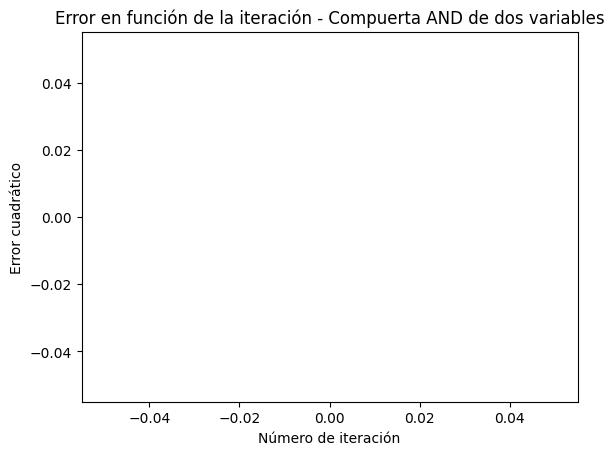

In [6]:
X = datos_AND[:, :2]  # Entradas (A, B)
Y = datos_AND[:, 2]  # Salidas (Y1) 

error_por_cambio = perceptron.train(X, Y, epochs=10, lr=0.1) # esto devuelve la lista de pesos calculados cada vez que hace un cambio. 
# 

plt.figure()
plt.plot(error_por_cambio)
plt.title("Error en función de la iteración - Compuerta AND de dos variables")
plt.xlabel('Número de iteración')
plt.ylabel('Error cuadrático')
plt.show()


In [7]:
def graficar_clase_y_frontera(X,Y,pesos,titulo):
    _, _, ejeX, ejeY = calcular_recta_con_pesos(pesos)

    plt.figure()
    plt.plot(ejeX, ejeY, '-r', label='Frontera de decisión')
    # tambien grafico las muestras X con el color dado por Y
    for i in range(len(X)): # acá itera por todas las filas de la matriz de datos, osea por todas las muestras
        if Y[i] == 1:
            plt.scatter(X[i,0], X[i,1], color='blue') # si es de una categoria usamos un color, sino otro
        else:
            plt.scatter(X[i,0], X[i,1], color='orange')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title(titulo)
    plt.xlabel('variable 1')
    plt.ylabel('variable 2')
    plt.legend()    
    plt.show()

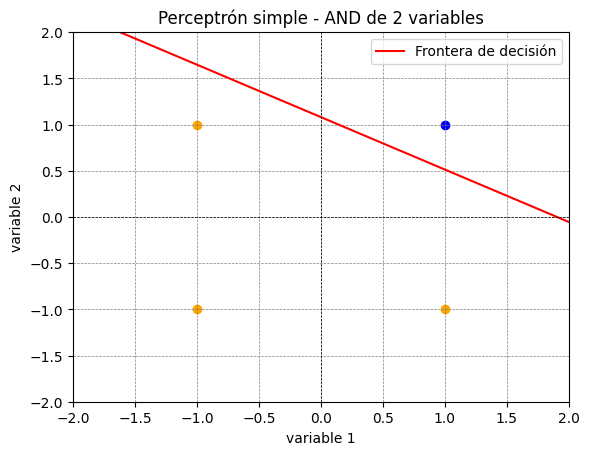

In [8]:
graficar_clase_y_frontera(X, Y, perceptron.pesos,'Perceptrón simple - AND de 2 variables')

Ahora lo mimso para la OR. 

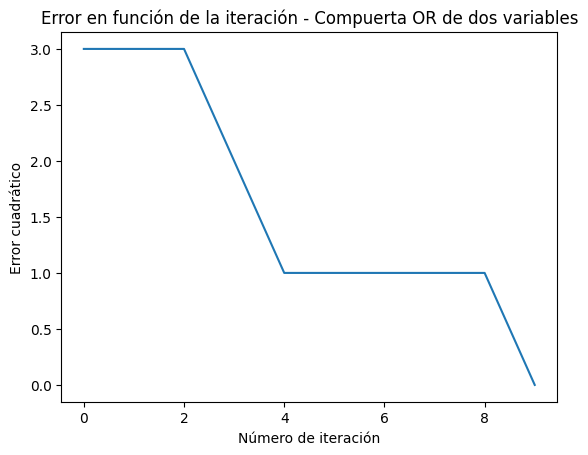

In [9]:
X = datos_OR[:, :2]  # Entradas (A, B)
Y = datos_OR[:, 2]  # Salidas (Y1) 

error_por_cambio = perceptron.train(X, Y, epochs=10, lr=0.1) # esto devuelve la lista de pesos calculados cada vez que hace un cambio. 
# 

plt.figure()
plt.plot(error_por_cambio)
plt.title("Error en función de la iteración - Compuerta OR de dos variables")
plt.xlabel('Número de iteración')
plt.ylabel('Error cuadrático')
plt.show()


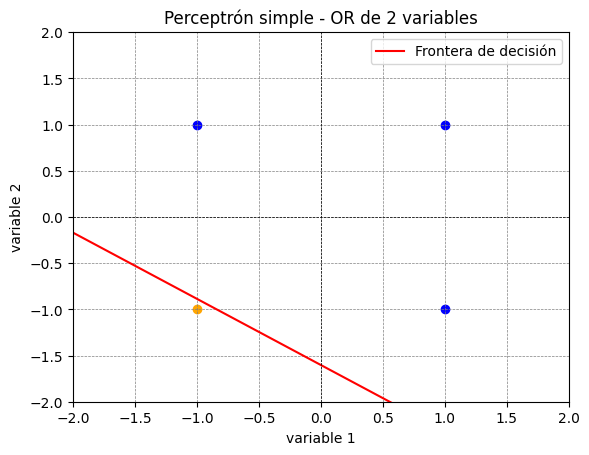

In [10]:
graficar_clase_y_frontera(X, Y, perceptron.pesos,'Perceptrón simple - OR de 2 variables')

Ahora armo las tablas para las de 4 variables, que es algo tedioso pero más tedioso sería codear algo que los genere.

In [11]:
A = np.array([-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1])
B = np.array([-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1])
C = np.array([-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
D = np.array([-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1])

Y1 = np.where(np.logical_and.reduce([A == 1, B == 1, C == 1, D == 1]), 1, -1)

Y2 = np.where(np.logical_or.reduce([A == 1, B == 1, C == 1, D == 1]), 1, -1)

# Convertir a matriz de columnas (A|B|C|D|Y)

datos_AND = np.column_stack((A, B, C, D, Y1))

datos_OR = np.column_stack((A, B, C, D, Y2))

print(datos_AND)

print(datos_OR)

[[-1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1]
 [ 1  1 -1 -1 -1]
 [-1 -1  1 -1 -1]
 [ 1 -1  1 -1 -1]
 [-1  1  1 -1 -1]
 [ 1  1  1 -1 -1]
 [-1 -1 -1  1 -1]
 [ 1 -1 -1  1 -1]
 [-1  1 -1  1 -1]
 [ 1  1 -1  1 -1]
 [-1 -1  1  1 -1]
 [ 1 -1  1  1 -1]
 [-1  1  1  1 -1]
 [ 1  1  1  1  1]]
[[-1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1]
 [-1  1 -1 -1  1]
 [ 1  1 -1 -1  1]
 [-1 -1  1 -1  1]
 [ 1 -1  1 -1  1]
 [-1  1  1 -1  1]
 [ 1  1  1 -1  1]
 [-1 -1 -1  1  1]
 [ 1 -1 -1  1  1]
 [-1  1 -1  1  1]
 [ 1  1 -1  1  1]
 [-1 -1  1  1  1]
 [ 1 -1  1  1  1]
 [-1  1  1  1  1]
 [ 1  1  1  1  1]]


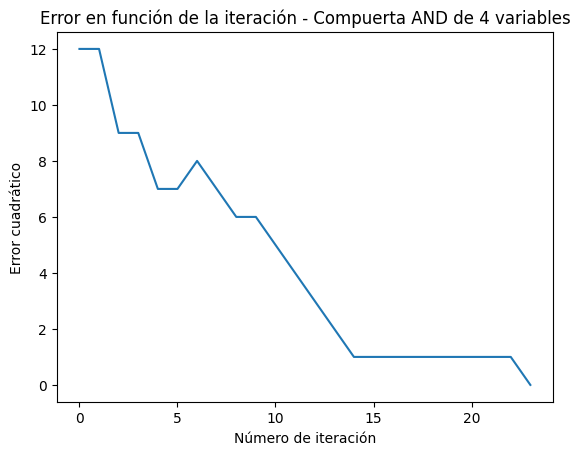

In [12]:
X = datos_AND[:, :4]  # Entradas (A, B,C,D)
Y = datos_AND[:, 4]  # Salidas (Y1) 

error_por_cambio = perceptron.train(X, Y, epochs=10, lr=0.1) # esto devuelve la lista de pesos calculados cada vez que hace un cambio. 
# 

plt.figure()
plt.plot(error_por_cambio)
plt.title("Error en función de la iteración - Compuerta AND de 4 variables")
plt.xlabel('Número de iteración')
plt.ylabel('Error cuadrático')
plt.show()


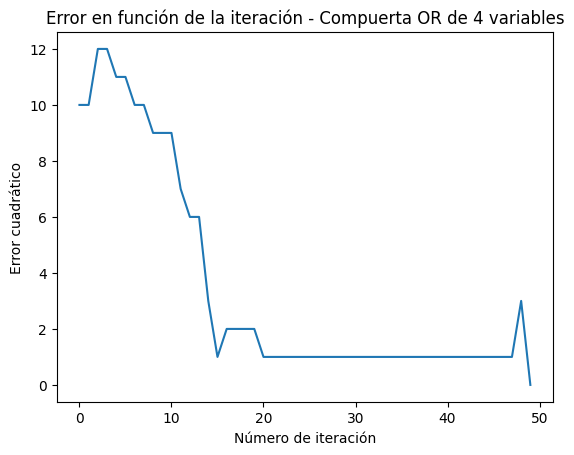

In [13]:
X = datos_OR[:, :4]  # Entradas (A, B,C,D)
Y = datos_OR[:, 4]  # Salidas (Y2) 

error_por_cambio = perceptron.train(X, Y, epochs=10, lr=0.1) # esto devuelve la lista de pesos calculados cada vez que hace un cambio. 
# 

plt.figure()
plt.plot(error_por_cambio)
plt.title("Error en función de la iteración - Compuerta OR de 4 variables")
plt.xlabel('Número de iteración')
plt.ylabel('Error cuadrático')
plt.show()


## Ej2
Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.

La capacidad de un perceptron está definida en la p.111 del libro "Introduction to the theory of neural computation". El experimento se debe hacer para para una cantidad particular de unidades de entrada, que sería la dimensión de nuestro espacio de features. A medida que este número N aumenta ($N \to \inf$), se demuestra que la capacidad de almacenamiento máxima del perceptron converge a $p_{max} = 2N$, con $p$ la cantidad de patrones. 

La idea es tomar un perceptron de cierto tamaño y alimentarlo con cada vez más patrones, y posiblemente hacerlo varias veces y promediar los resultados. 

In [ ]:
class evaluar_capacidad:
    def __init__(self,N):
        """
        N es la cantidad de unidades de entrada
        """
        self.modelo = perceptron_simple() # generamos un modelo de perceptron
        self.N = N # la dimensión de entrada
        self.resultados = {}
        return
    
    def generar_patrones(self,p):
        """
        Genera p patrones aleatorios de dimensión N, con etiquetas ±1.
        X: matriz de shape (p, N)
        y: vector de shape (p,)
        """
        X = np.random.uniform(-1, 1, size=(p, self.N))   # entradas uniformes en (-1,1)
        y = np.random.choice([-1, 1], size=p) # salidas con prob 1/2 -> uniforme {-1,1}
        return X, y
    
    def test(self,cantidad=-1, repeticiones=20, epochs=500, lr=0.1):
        """
        cantidad sería el máximo hasta el que probar
        repeticiones es para el promediado
        """
        if cantidad==-1:
            cantidad =  3*self.N    # para pasarnos de 2N

        for p in range(1, cantidad + 1):
            exitos = 0
            for _ in range(repeticiones):
                X, y = self.generar_patrones(p)
                modelo = perceptron_simple()
                modelo.train(X, y, epochs=epochs, lr=lr)
                if modelo.convergencia:
                    exitos += 1
            # probabilidad de éxito para ese p
            self.resultados[p] = exitos / repeticiones

        return self.resultados

In [ ]:
from joblib import Parallel, delayed

class evaluar_capacidad:
    def __init__(self,N):
        """
        N es la cantidad de unidades de entrada
        """
        self.modelo = perceptron_simple() # generamos un modelo de perceptron
        self.N = N # la dimensión de entrada
        self.resultados = {}
        return
    
    def generar_patrones(self,p):
        """
        Genera p patrones aleatorios de dimensión N, con etiquetas ±1.
        X: matriz de shape (p, N)
        y: vector de shape (p,)
        """
        X = np.random.uniform(-1, 1, size=(p, self.N))   # entradas uniformes en (-1,1)
        y = np.random.choice([-1, 1], size=p) # salidas con prob 1/2 -> uniforme {-1,1}
        return X, y
    
    def _una_repeticion(self, p, epochs, lr):
        X, y = self.generar_patrones(p)
        modelo = perceptron_simple()
        modelo.train(X, y, epochs=epochs, lr=lr)
        return int(modelo.convergencia)
    
    def test(self,cantidad=-1, repeticiones=20, epochs=20, lr=0.1, n_jobs=-1):
        """
        cantidad sería el máximo hasta el que probar
        repeticiones es para el promediado
        n_jobs: cantidad de procesos paralelos (-1 usa todos los cores)
        """
        if cantidad==-1:
            cantidad =  3*self.N    # para pasarnos de 2N

        for p in range(1, cantidad + 1):
            resultados = Parallel(n_jobs=n_jobs)(delayed(self._una_repeticion)(p, epochs, lr) for _ in range(repeticiones))
            self.resultados[p] = np.mean(resultados)
        return self.resultados

In [17]:
a = evaluar_capacidad(20)

In [ ]:
resultados = a.test(repeticiones=50,epochs=50,lr=0.2)

In [ ]:
plt.figure()
plt.plot(list(resultados.keys()), list(resultados.values()), marker='o')
plt.title("Resultados de la Evaluación")
plt.xlabel("Número de Patrones")
plt.ylabel("Precisión")
plt.grid()
plt.show()